[0, 1.995, 3.41, 4.475, 5.29, 6.12, 6.885, 7.615, 8.15, 8.675, 9.28, 9.915, 10.475, 11.02, 11.51, 11.925, 12.37, 12.745, 13.25, 13.77, 14.175, 14.565, 15.005, 15.32, 15.685, 16.075, 16.41, 16.795, 17.1, 17.42, 17.82, 18.2, 18.45, 18.795, 19.12, 19.41, 19.705, 20.005, 20.305, 20.55, 20.81, 21.115, 21.405, 21.68, 21.94, 22.145, 22.485, 22.755, 22.985, 23.22, 23.405, 23.58, 23.83, 24.065, 24.32, 24.49, 24.73, 24.93, 25.14, 25.36, 25.565, 25.83, 26.01, 26.23, 26.5, 26.75, 26.97, 27.235, 27.47, 27.76, 27.89, 28.105, 28.37, 28.585, 28.84, 29.04, 29.3, 29.575, 29.845, 30.025, 30.235, 30.44, 30.55, 30.77, 30.945, 31.135, 31.355, 31.555, 31.795, 32.01, 32.22, 32.41, 32.66, 32.88, 33.125, 33.325, 33.515, 33.68, 33.87, 34.04, 34.26, 34.415, 34.565, 34.74, 34.88, 35.05, 35.255, 35.39, 35.57, 35.72, 35.865, 36.04, 36.255, 36.405, 36.615, 36.785, 36.955, 37.11, 37.31, 37.44, 37.635, 37.78, 37.98, 38.075, 38.27, 38.365, 38.575, 38.79, 38.93, 39.125, 39.275, 39.405, 39.49, 39.705, 39.855, 40.04, 40.23

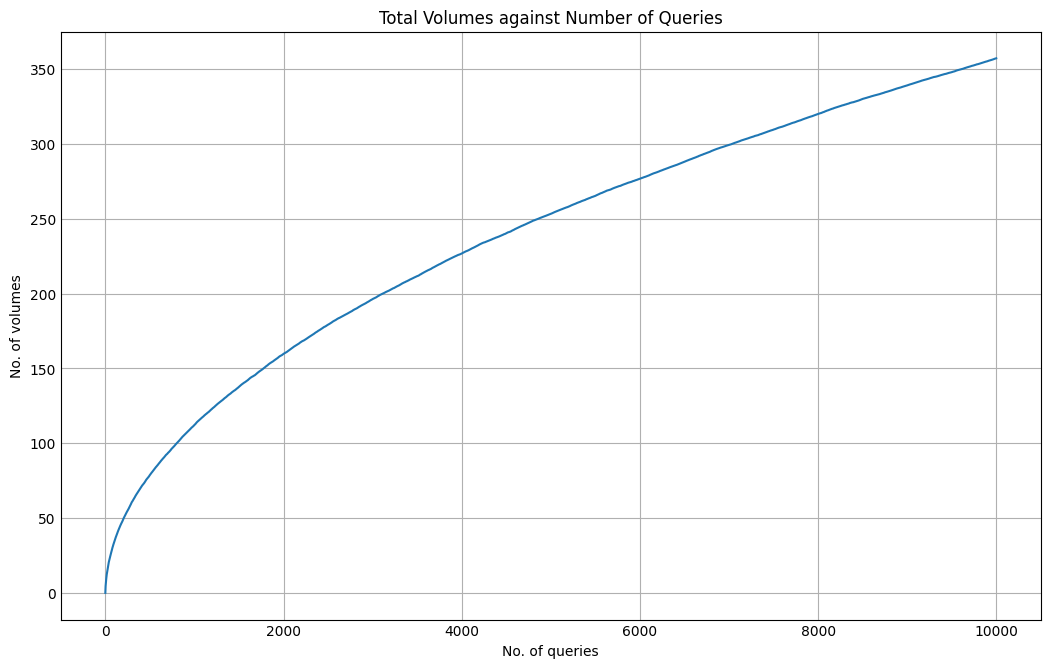

In [3]:
import math 
import random 
import matplotlib.pyplot as plt 

#overcoveraugwithreplacement

RSEmax = 2048

def is_power_of_two(x):
    return (x & (x - 1)) == 0

def overcover(start, end):
    diff = (end - start) - 1
    while True:
        diff += 1
        if is_power_of_two(diff + 1):  # Check if diff + 1 is a power of 2
            N = math.log(diff + 1, 2)
            break
    if start == end:
        return (start, end)
    elif start == end - 1:
        return (start, end)
    else:
        for i in range(int(N), int(math.log(RSEmax, 2)) + 1):  # Ensure N is an integer
            for j in range(0, start):
                if (start - j) % 2**(i-1) == 1:
                    if start - j + 2**i - 1 >= end:
                        return (start - j, start - j + 2**i - 1)
                    else:
                        break

query_range_list = []
for i in range (RSEmax):
    for j in range (i+1):
        query_range_list.append(j)

def query_gen():
    no_range = random.choice(query_range_list)
    first_int = random.randint(1, RSEmax-no_range)
    query = (first_int, first_int+no_range)
    return(query)

max_volumes = 3*RSEmax - (math.log(RSEmax, 2) + 2)
no_of_runs = 200
no_of_queries = 10000
def augovercover_query(no_of_runs, no_of_queries):
    arr = [0 for i in range(no_of_queries+1)]
    for h in range(no_of_runs):
        vol_tracker = []
        vol_sum = 0
        query_tracker = []
        for j in range(no_of_queries):
            query_asked = query_gen()
            if len(vol_tracker) == max_volumes: 
                for i in range(max_volumes, no_of_queries):
                    arr[i+1] = max_volumes*no_of_runs
                break   
            if len(query_tracker) == int((RSEmax*(RSEmax + 1))/2):
                break   
            query_tracker.append(query_asked)
            (a, b) = query_asked
            query_list = overcover(a, b)
            for i in query_list:
                if i not in vol_tracker:
                    vol_tracker.append(i)
                    vol_sum +=1
            arr[j+1] = arr[j+1] + vol_sum
                
    for i in range(no_of_queries):
        arr[i+1] = arr[i+1] /no_of_runs
    return(arr)

arr = augovercover_query(no_of_runs,no_of_queries) 
print(arr)

plt.style.use('_mpl-gallery')
plt.figure(figsize=(10,6))
plt.plot(arr)
plt.xlabel("No. of queries")  
plt.ylabel("No. of volumes")  
plt.title("Total Volumes against Number of Queries")  
plt.show()